In [48]:
# py -m pip install regexp
# pip install glob2

In [1]:
import os 
import glob
import regex
import matplotlib.pyplot as plt
import numpy as np
# import re

## 1. Load files

In [2]:
files = [f for f in glob.glob('ustawy/*')]
len(files)

1179

## 2. Prepare regexps
a) addition of a unit (e.g. dodaje się ust. 5a),\
b) removal of a unit (e.g. w art. 10 ust. 1 pkt 8 skreśla się),\
c) change of a unit (e.g. art. 5 otrzymuje brzmienie)

In [3]:
# regexp_addition = r'dodaj[eę] si[eę]\s?(?:nowy)?\s?(?:ust|pkt|lit|rozdział|ust|§|art|poz).?\s?(?:\d+[a-zA-Z]?|[a-zA-Z]?\)?)?'
regexp_addition = r'(?:po)?\s*(?:ust|pkt|lit|rozdzia[lł]|ust|§|art|poz)*?\.?\s*(?:\d*[a-z]?\)?)?\s*dodaj[eę] si[eę](?!.wyraz|.zdani|.przecin)\s*(?:nowy)?\s*(?:ust|pkt|lit|rozdzia[lł]|ust|§|art|poz)*\.?\s*(?:\d*[a-z]*\.*\)?)?'
regexp_removal = r'(?:ust|pkt|lit|rozdzia[lł]|ust|§|art|poz)*\.?\s*(?:\d*[a-z]*\.*\)?)?\s*(?:skreśla|uchyla)\s*si[eę](?!.wyraz|.zdani|.przecin|.kropk|.\n|.i dodaj)\:?\s*(?:ust|pkt|lit|rozdzia[lł]|ust|§|art|poz)*\.?\s*(?:\d*[a-z]*\.*\)?)?'
regexp_change = r'(?:ust|pkt|lit|rozdzia[lł]|ust|§|art|poz)*\.*\w*\s*(?:otrzymuj[eą]\s*(?:brzmieni[ea]|[o ]znaczeni[ea])|oznacza si[eę] jako)'

In [25]:
reg_year = r'USTAWA\s+(?:KONSTYTUCYJNA)?\s*z dnia\s+\d+\s+\w+\s+(\d{4})'

## 3. Search in files

In [ ]:
results = {'add': {}, 'rem': {}, 'cha': {}}
results2 = {'add': {}, 'rem': {}, 'cha': {}}
years = []
years2 = []
for file in files:
    year = str(regex.findall(r'(\d{4})_', file)[0])
    if year not in years:
        years.append(year)
        results['add'][year] = 0 
        results['rem'][year] = 0 
        results['cha'][year] = 0
    with open(file, encoding='UTF-8') as f:
        text = f.read()
        year2 = regex.findall(reg_year, text, flags=regex.IGNORECASE)
        if not year2:
            print(file)
            year2 = '0'
        else:
            year2 = str(year2[0])
        if year2 not in years2:
            years2.append(year2)
            results2['add'][year2] = 0 
            results2['rem'][year2] = 0 
            results2['cha'][year2] = 0
        reg_add = regex.findall(regexp_addition, text, flags=regex.IGNORECASE) 
        if reg_add:
            results['add'][year] += len(reg_add)
            results2['add'][year2] += len(reg_add)
        reg_rem = regex.findall(regexp_removal, text, flags=regex.IGNORECASE) 
        if reg_rem:
            results['rem'][year] += len(reg_rem)
            results2['rem'][year2] += len(reg_rem)
        reg_cha = regex.findall(regexp_change, text, flags=regex.IGNORECASE) 
        if reg_cha:
            results['cha'][year] += len(reg_cha)
            results2['cha'][year2] += len(reg_cha)


In [29]:
# sum(results['add'].values()), sum(results['rem'].values()), sum(results['cha'].values())

In [30]:
add_vals = np.array(list(results['add'].values())).astype('float')
rem_vals = np.array(list(results['rem'].values())).astype('float')
cha_vals = np.array(list(results['cha'].values())).astype('float')
all_sum = np.add(np.add(add_vals, rem_vals), cha_vals)

In [42]:
results2['add'] = dict(sorted(results2['add'].items()))
results2['rem'] = dict(sorted(results2['rem'].items()))
results2['cha'] = dict(sorted(results2['cha'].items()))
add_vals2 = np.array(list(results2['add'].values())).astype('float')
rem_vals2 = np.array(list(results2['rem'].values())).astype('float')
cha_vals2 = np.array(list(results2['cha'].values())).astype('float')
del results2['add']['0']
del results2['rem']['0']
del results2['cha']['0']
all_sum2 = np.add(np.add(add_vals2, rem_vals2), cha_vals2)
add_vals2.sort()
years2.sort()

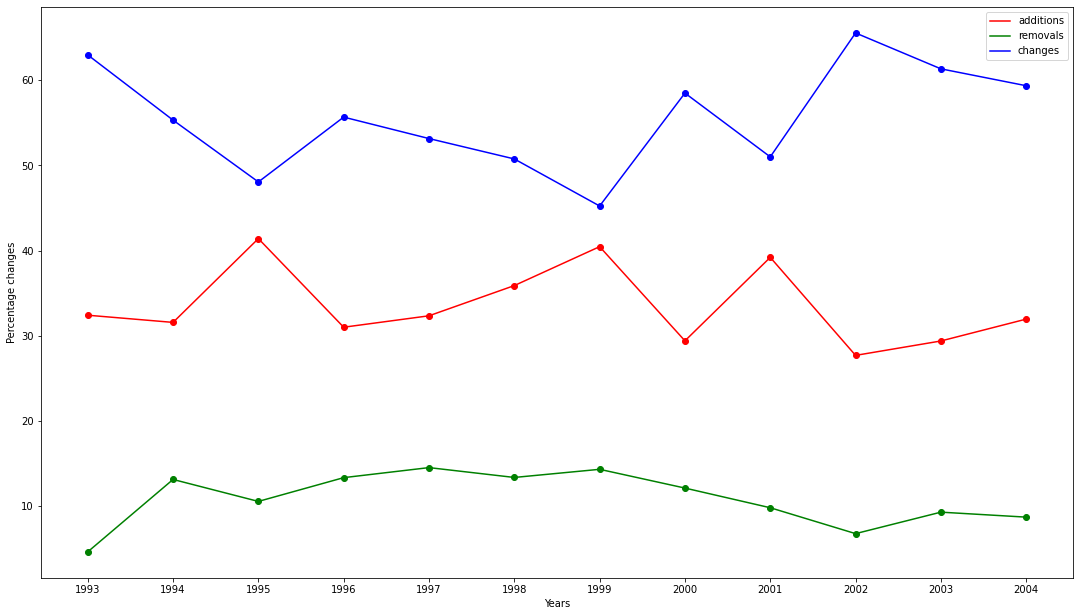

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.plot(years, add_vals/all_sum*100, color='r')
ax.plot(years, rem_vals/all_sum*100, color='g')
ax.plot(years, cha_vals/all_sum*100, color='b')
ax.scatter(years, add_vals/all_sum*100, color='r')
ax.scatter(years, rem_vals/all_sum*100, color='g')
ax.scatter(years, cha_vals/all_sum*100, color='b')

ax.set(xlabel='Years', ylabel='Percentage changes')
ax.legend(['additions','removals','changes'])

fig.savefig("test.png")
plt.show()

NameError: name 'years2' is not defined

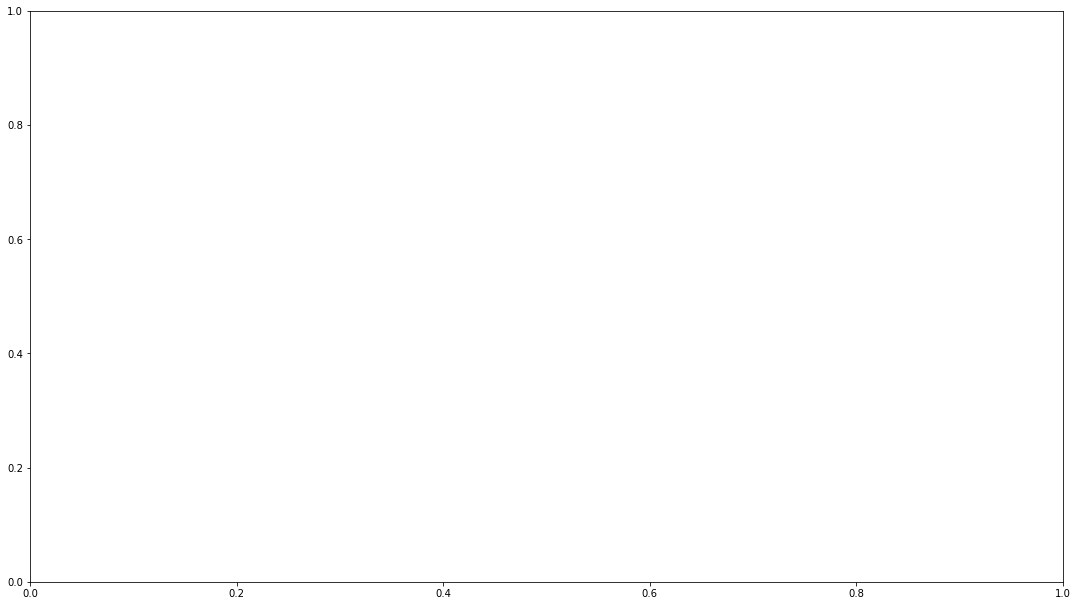

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.plot(years2, add_vals2/all_sum2*100, color='r')
ax.plot(years2, rem_vals2/all_sum2*100, color='g')
ax.plot(years2, cha_vals2/all_sum2*100, color='b')
ax.scatter(years2, add_vals2/all_sum2*100, color='r')
ax.scatter(years2, rem_vals2/all_sum2*100, color='g')
ax.scatter(years2, cha_vals2/all_sum2*100, color='b')

ax.set(xlabel='Years', ylabel='Percentage changes')
ax.legend(['additions','removals','changes'])

fig.savefig("test.png")
plt.show()


## Ustawy

In [41]:
# All forms of "ustawa".
regex_ustawa = r'(?:ustaw(?:y|ę|ą|ie|om|o|ami|ach|a|\s|\b))'
# regex_ustawa = r'(?:ustaw(?:y|ę|ą|ie|om|o|ami|ach|a|\s|\b))'
cnt1 = 0
for file in files:
    with open(file, encoding='UTF-8') as f:
        text = f.read()
        reg_u = regex.findall(regex_ustawa, text, flags=regex.IGNORECASE)
        
        if len(reg_u):
            cnt1 += len(reg_u)
cnt1

25705

In [49]:
# All forms followed by "z dnia".
regex_ustawa = r'(?:ustaw(?:y|ę|e|ą|ie|om|o|ami|ach|a|\s|\b)(?:.z dnia))'
# regex_ustawa = r'(?:ustaw(?:y|ę|e|ą|ie|om|o|ami|ach|a|\s|\b)(?:.z dnia))'
cnt2 = 0
for file in files:
    with open(file, encoding='UTF-8') as f:
        text = f.read()
        reg_u = regex.findall(regex_ustawa, text, flags=regex.IGNORECASE)
        if 'ustawach' in reg_u:
            print(reg_u)
        if len(reg_u):
            cnt2 += len(reg_u)
cnt2

6935

In [59]:
# All forms followed by "z dnia".
regex_ustawa = r'(?:ustaw(?:y|ę|e|ą|ie|om|o|ami|ach|a|\s|\b)(?:\s*z dnia))'
cnt2 = 0
for file in files:
    with open(file, encoding='UTF-8') as f:
        text = f.read()
        reg_u = regex.findall(regex_ustawa, text, flags=regex.IGNORECASE)
        if 'ustawach' in reg_u:
            print(reg_u)
        if len(reg_u):
            cnt2 += len(reg_u)
cnt2

8103

In [58]:
# All forms NOT followed by "z dnia".
regex_ustawa = r'(?:ustaw(?:(?:y|ę|e|ą|ie|om|o|ami|ach|a|\s|\b)|a[^cm])(?!\s*z dnia))'
# regex_ustawa = r'(?:ustaw(?:y|ę|e|ą|ie|om|o|ami|ach|a|\s|\b)(?!.z dnia))'
cnt3 = 0
for file in files:
    with open(file, encoding='UTF-8') as f:
        text = f.read()
        reg_u = regex.findall(regex_ustawa, text, flags=regex.IGNORECASE)
        # if 'ustawach' in reg_u:
        #     print(reg_u)
        if len(reg_u):
            cnt3 += len(reg_u)
cnt3

17602

In [60]:
cnt1 == cnt2 + cnt3, cnt1, cnt2 + cnt3

(True, 25705, 25705)

In [184]:
# All forms not preceded by "o zmianie".
regex_ustawa = r'(?:(?<!o zmianie.)ustaw(?:y|ę|ą|ie|om|o|ami|ach|a|\s))'
cnt4 = 0
for file in files:
    with open(file, encoding='UTF-8') as f:
        text = f.read()
        reg_u = regex.findall(regex_ustawa, text, flags=regex.IGNORECASE)
        if len(reg_u):
            cnt4 += len(reg_u)
cnt4

24695

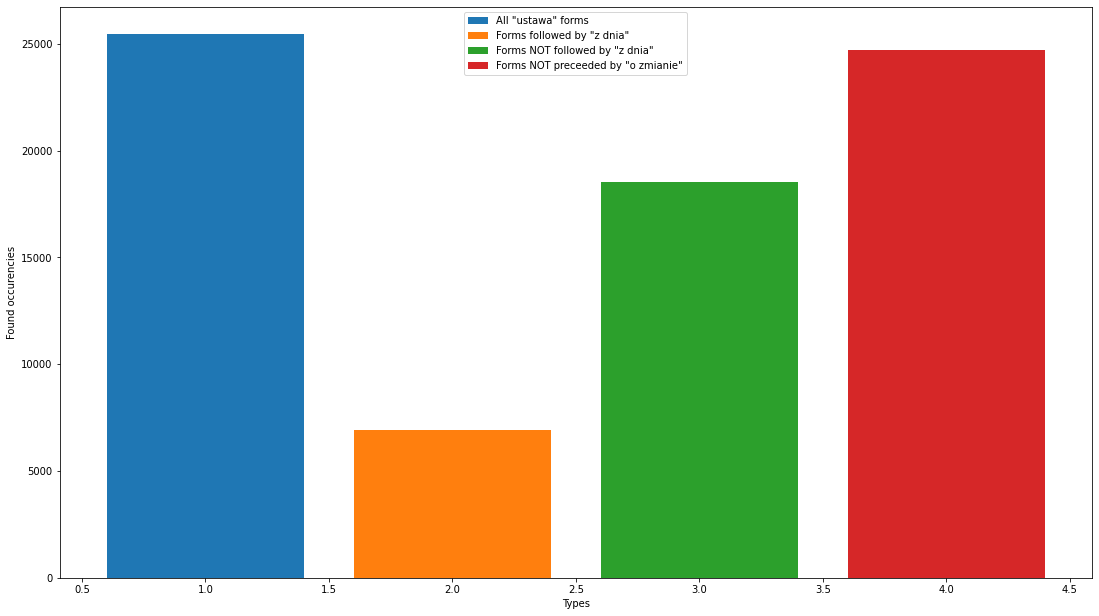

In [186]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.bar([1], [cnt1])
ax.bar([2], [cnt2])
ax.bar([3], [cnt3])
ax.bar([4], [cnt4])

ax.set(xlabel='Types', ylabel='Found occurencies')
ax.legend(['All "ustawa" forms','Forms followed by "z dnia"','Forms NOT followed by "z dnia"','Forms NOT preceeded by "o zmianie"'])

fig.savefig("test.png")
plt.show()